In [21]:
import random
class AMM:
    def __init__(self):
        self.C = 100000
        self.D = random.randint(int(self.C**.25), int(self.C**.75))
        self.T = self.C / self.D

    def __repr__(self):
        return f"AMM ({self.D}, {self.T}) - C = {self.C}"


def arbitrage(amm1, amm2):
    Di, Ti, Ci = amm1.D, amm1.T, amm1.C
    Dj, Tj, Cj = amm2.D, amm2.T, amm2.C
    # optimal arbitrage formula
    dDi = ((Ci*Cj)**.5 - Di * Tj) / (Ti + Tj)
    dTi = Ci / (Di + dDi) - Ti
    dTj = -dTi
    dDj = Cj / (Tj + dTj) - Dj
    amm1.D, amm1.T, amm2.D, amm2.T = Di+dDi, Ti+dTi, Dj+dDj, Tj+dTj
    # sanity checks
    assert abs(amm1.D*amm1.T - amm1.C) < 1e-2, f"constant product violated: expected: {Ci}, actual: {amm1.D*amm1.T}"
    assert abs(amm2.D*amm2.T - amm2.C) < 1e-2, f"constant product violated: expected: {Cj}, actual: {amm2.D*amm2.T}"
    assert abs(amm1.D / amm1.T - amm2.D / amm2.T) < 1e-7, f"prices should be equal: {amm1.D / amm1.T}, {amm2.D / amm2.T}"

def are_balanced(amms, epsilon, mu):
    variance = sum((amm.T / amm.C**.5 - mu)**2 for amm in amms) / len(amms)
    print(variance)
    return variance < epsilon

In [22]:
import numpy as np
def num_steps(n_amms, epsilon):
    AMMs = [AMM() for _ in range(n_amms)]
    mu = sum(amm.T for amm in AMMs) / sum(amm.C**.5 for amm in AMMs)
    i = 0
    while not are_balanced(AMMs, epsilon, mu):
        i += 1
        random.shuffle(AMMs)
        for amm1, amm2 in zip(AMMs[:-1], AMMs[1:]):
            arbitrage(amm1, amm2)
    return i

amm_ns = range(10, 10000, 500)
print(len(amm_ns))
steps1 = [num_steps(n, 1e-3) for n in amm_ns]
# list of epsilons to try, from 1e-1 to 1e-4, logarithmically spaced with 50 points
epsilons = np.logspace(-1, -4, 100)
# # print(epsilons)
steps2 = [num_steps(1000, epsilon) for epsilon in epsilons]

20
0.0026130386787983177
0.0006764105434795818
0.7472827842146237
0.24760777907818607
0.08041971004980446
0.025703874179021365
0.008506218385833772
0.00277971499220542
0.0009239978016187261
0.9449817762903208
0.3106147909777678
0.10310726877495335
0.036031644735893216
0.012169317754767175
0.003950959517242696
0.0012534112619897032
0.0004292213035070958
1.1670657130285875
0.39525293951889157
0.127957777635575
0.04171324572936422
0.013799501932480933
0.004734246042302465
0.0016276931072556685
0.0005687364261994157
1.2223318091291815
0.40798486477412754
0.13578939310858315
0.044612724005784005
0.015053835712455
0.004975405443958506
0.0016553474961498982
0.0005680511769007184
1.0761321425989137
0.3662893263427463
0.12197703662654545
0.04016095120976259
0.013202068203850512
0.004533657497345368
0.0015004186504969954
0.0005052727118498433
0.6469539932812275
0.21601720168857333
0.07187488520933721
0.023535238279355487
0.007793250701436259
0.002513936537009579
0.0008387153441273493
0.960685597

In [35]:
len(amm_ns)

10

Text(0, 0.5, 'Number of loops')

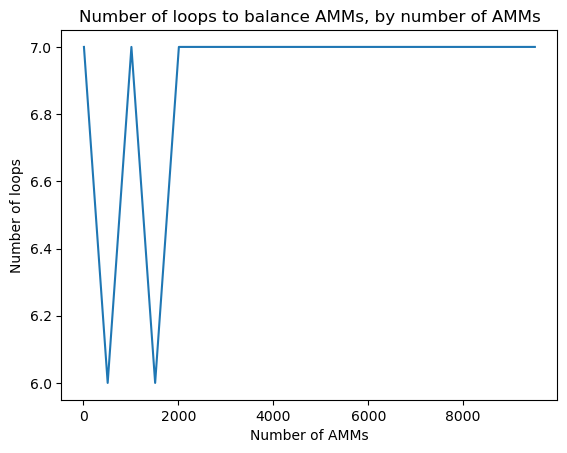

In [6]:
import matplotlib.pyplot as plt
plt.plot(amm_ns, steps1)
plt.title("Number of loops to balance AMMs, by number of AMMs")
plt.xlabel("Number of AMMs")
plt.ylabel("Number of loops")

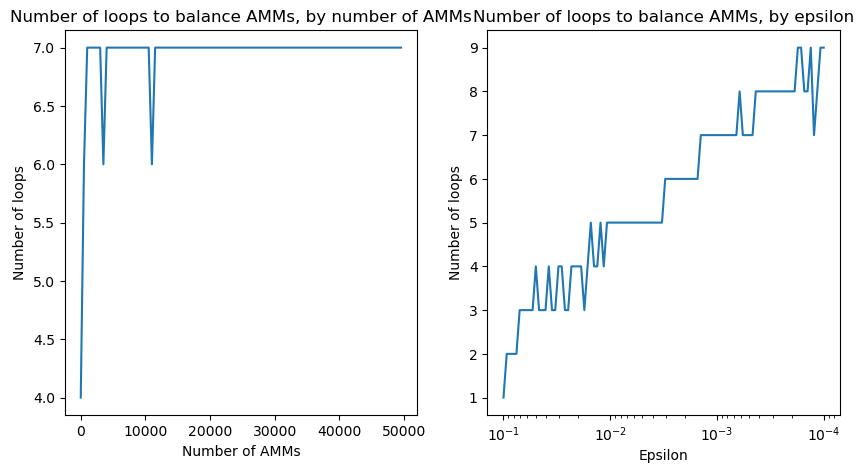

In [59]:
graph, (plot1, plot2) = plt.subplots(1, 2, figsize=(10, 5))
plot1.plot(amm_ns, steps1)
plot1.set_title("Number of loops to balance AMMs, by number of AMMs")
plot1.set_xlabel("Number of AMMs")
plot1.set_ylabel("Number of loops")


plot2.plot(epsilons, steps2)
plot2.set_title("Number of loops to balance AMMs, by epsilon")
plot2.set_xlabel("Epsilon")
plot2.set_ylabel("Number of loops")
plot2.invert_xaxis()
plot2.set_xscale('log')

AttributeError: module 'matplotlib.pyplot' has no attribute 'invert_xaxis'

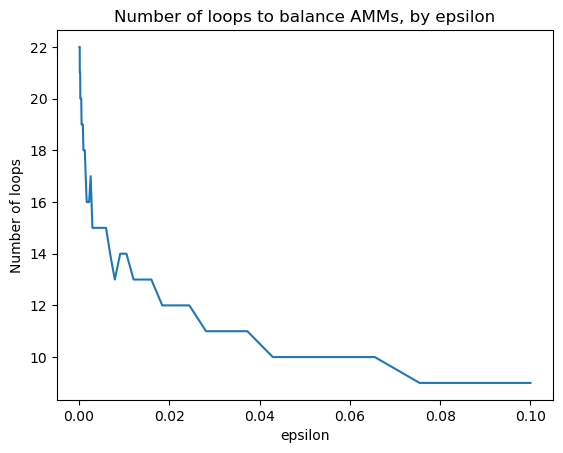

In [36]:
import matplotlib.pyplot as plt
plt.plot(epsilons, steps2)
plt.title("Number of loops to balance AMMs, by epsilon")
plt.xlabel("epsilon")
plt.ylabel("Number of loops")
plt.invert_xaxis()

#### Old implementation before using the formula for delta D:

In [30]:
import random
class AMM:
    def __init__(self):
        self.R = [random.randint(10,1000), random.randint(10,1000)]
        self.cp = round(float(self.R[0] * self.R[1]), 2)

    def __repr__(self):
        return f"AMM R={self.R}, cp={self.cp}"

    def price(self, output_pool, output_amount):
        input_pool = int(not output_pool)
        if self.R[output_pool] <= output_amount:
            return float('inf')
        price = output_amount * self.R[input_pool] / (self.R[output_pool] - output_amount)
        new_cp = (self.R[output_pool] - output_amount) * (self.R[input_pool] + price)
        assert round(new_cp, 2) == self.cp, f"constant product violated: expected: {self.cp}, actual: {new_cp}"
        return price
    
    def quote(self, input_pool, input_amount):
        output_pool = int(not input_pool)
        quote = input_amount * self.R[output_pool] / (self.R[input_pool] + input_amount)
        new_cp = (self.R[output_pool] - quote) * (self.R[input_pool] + input_amount)
        assert round(new_cp, 2) == self.cp, f"constant product violated: expected: {self.cp}, actual: {new_cp}"
        return quote
    
    def buy(self, purchased_pool, purchase_amount, trader=None):
        spent_pool = int(not purchased_pool)
        price = self.price(purchased_pool, purchase_amount)
        # print(f"original: {self}")
        self.R[spent_pool] += price
        self.R[purchased_pool] -= purchase_amount
        if trader:
            trader.B[spent_pool] -= price
            trader.B[purchased_pool] += purchase_amount

In [31]:
# just to make sure that the trader is making a profit for debugging
class Trader:
    def __init__(self):
        self.B = [0,0]
    
t = Trader()

In [32]:
amms = [AMM() for _ in range(1000)]
AMOUNT = 0.2
def arbitrage(amm1, amm2):
    # trade AMOUNT units of either currency as long as there is an arbitrage opportunity
    while True:
        # price of currency 1
        i0 = amm1.price(1, AMOUNT)
        # output of currency 0 from 1 of currency 1
        o0 = amm2.quote(1, AMOUNT)
        if o0 - i0 > 0:
            # spend (0, i0), get (1,1)
            amm1.buy(1, AMOUNT, t)
            # spend (1,1), get (0, o0). the price will be (1,1), which we just bought
            amm2.buy(0, o0, t)
            # print(f"profit: {o0-i0} of currency 0")
            continue
        # price of currency 1
        i1 = amm1.price(0, AMOUNT)
        # output of currency 0 from 1 of currency 1
        o1 = amm2.quote(0, AMOUNT)
        if o1 - i1 > 0:
            # spend (0, i0), get (1,1)
            amm1.buy(0, AMOUNT, t)
            # spend (1,1), get (0, o0). the price will be (1,1), which we just bought
            amm2.buy(1, o1, t)
            # print(f"profit: {o0-i0} of currency 0")
            continue
        break

In [33]:
def is_balanced(amms, epsilon):
    avg_ratio = sum(amm.R[0] / amm.R[1] for amm in amms) / len(amms)
    outside_bounds = sum(abs(amm.R[0] / amm.R[1] - avg_ratio) > epsilon for amm in amms)
    print(f"{outside_bounds} outside bounds")
    return outside_bounds == 0
is_balanced(amms, 1)

759 outside bounds


False

In [34]:
j = 0
while not is_balanced(amms, 1e-2):
    random.shuffle(amms)
    print(j)
    j += 1
    for amm1, amm2 in zip(amms[:-1], amms[1:]):
        arbitrage(amm1, amm2)

998 outside bounds
0
987 outside bounds
1
983 outside bounds
2
945 outside bounds
3
904 outside bounds
4
842 outside bounds
5
745 outside bounds
6
581 outside bounds
7
368 outside bounds
8
124 outside bounds
9
23 outside bounds
10
4 outside bounds
11
0 outside bounds


In [ ]:
import uniswap